# TALLER BANCO

Nicolas Rodriguez Lasso

Obtencion de informacion del dataset

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df_customers = pd.read_csv("../Datasets/Bank/BankCustomerData.csv")
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           42639 non-null  int64 
 1   job           42639 non-null  object
 2   marital       42639 non-null  object
 3   education     42639 non-null  object
 4   default       42639 non-null  object
 5   balance       42639 non-null  int64 
 6   housing       42639 non-null  object
 7   loan          42639 non-null  object
 8   contact       42639 non-null  object
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  poutcome      42639 non-null  object
 16  term_deposit  42639 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


In [17]:
df_customers.describe()

age        balance           day      duration      campaign  \
count  42639.000000   42639.000000  42639.000000  42639.000000  42639.000000   
mean      40.788808    1331.863951     15.854781    255.957504      2.816412   
std       10.200236    3011.537676      8.293901    258.361368      3.163564   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      62.000000      8.000000    101.000000      1.000000   
50%       39.000000     429.000000     16.000000    177.000000      2.000000   
75%       48.000000    1381.500000     21.000000    315.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  42639.000000  42639.000000  
mean      34.169141      0.465442  
std       92.041713      2.166705  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      536.000000    275.000000

Miremos el dataset

In [2]:
df_customers.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  \
0  unknown    5   may       261         1     -1         0  unknown   
1  unknown    5   may       151         1     -1         0  unknown   
2  unknown    5   may        76         1     -1         0  unknown   
3  unknown    5   may        92         1     -1         0  unknown   
4  unknown    5   may       198         1     -1         0  unknown   

  term_deposit  
0           no  
1           no  
2           no  
3           no  
4           no

In [18]:
df_customers.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64

Visualizacion de los datos

Matriz de correlacion

<AxesSubplot:>

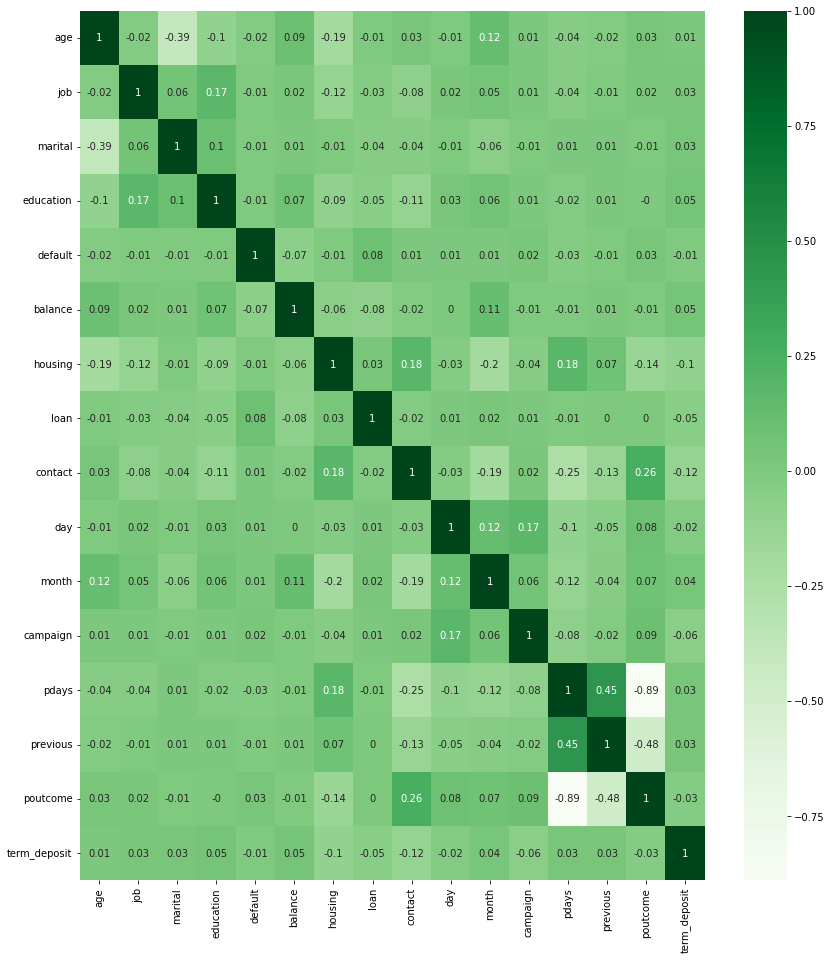

In [16]:
plt.subplots(figsize=(14, 16))
correlation_matrix = df_customers.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True, cmap="Greens")

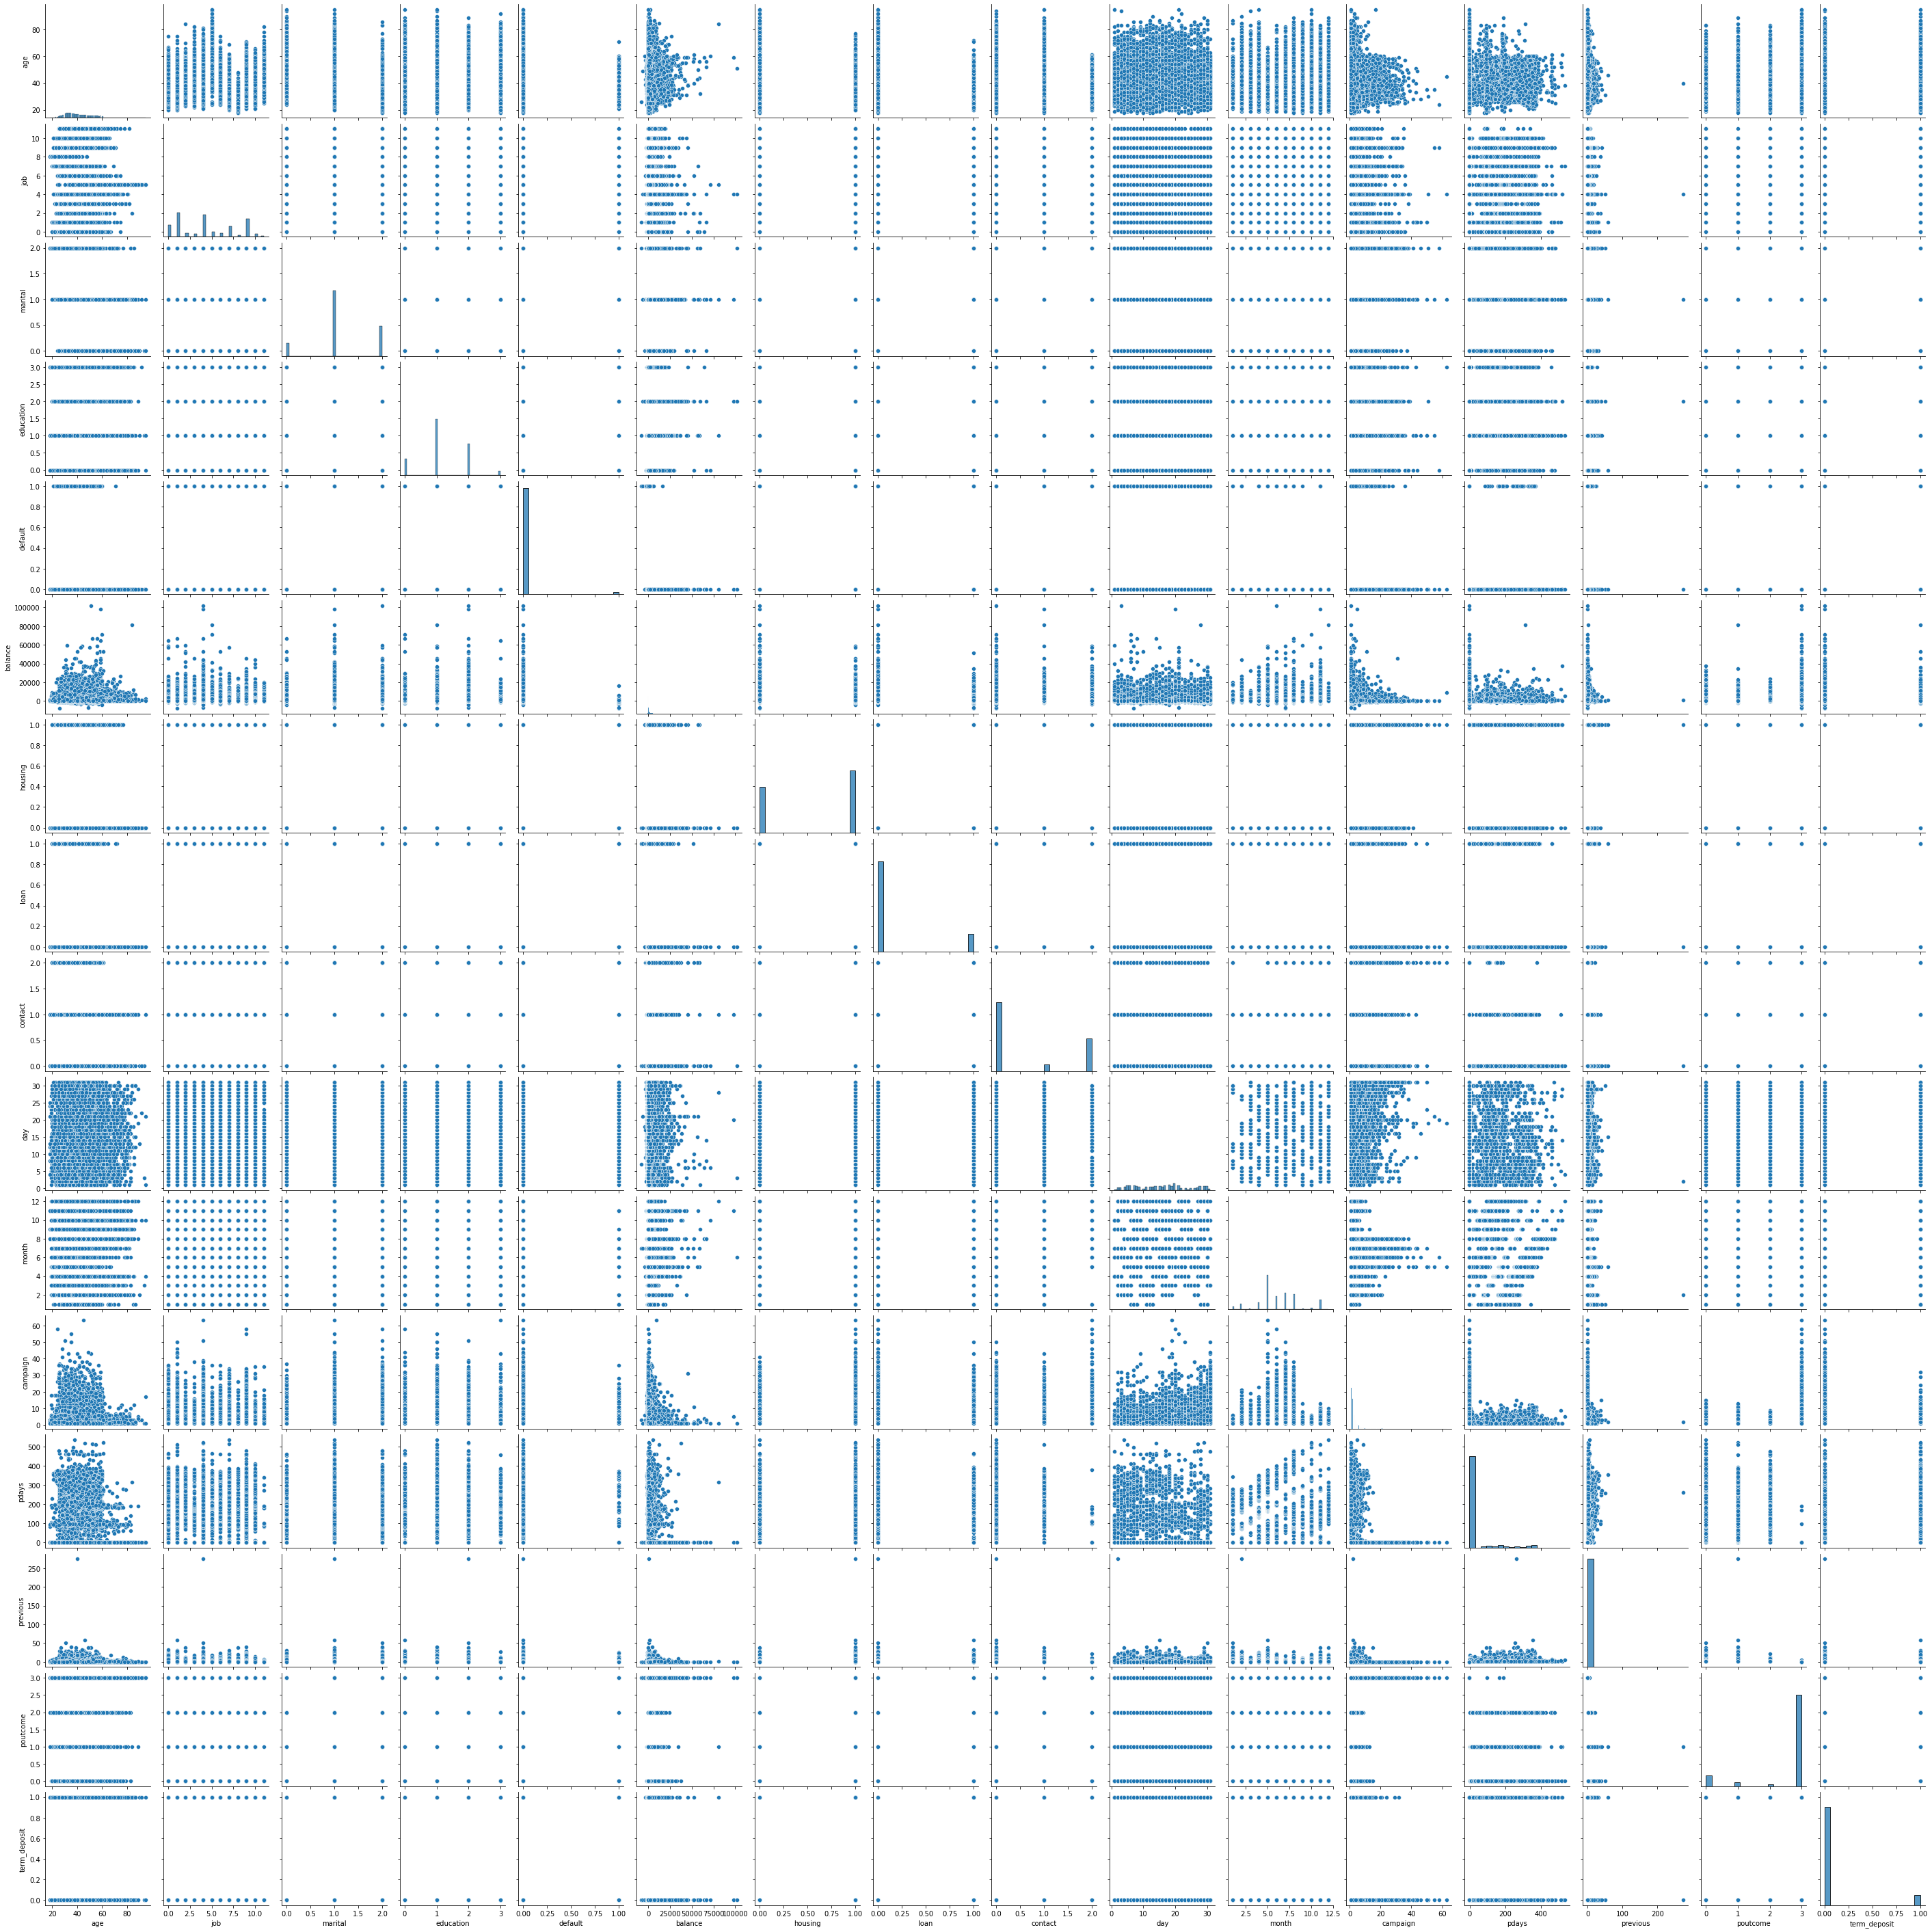

In [11]:
sns.pairplot(df_customers)

Procesamiento y limpieza de la informacion

Conversion de datos categoricos a numericos

In [13]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_customers['job'] = label_encoder.fit_transform(df_customers['job']).astype('int64')
df_customers['marital'] = label_encoder.fit_transform(df_customers['marital']).astype('int64')
df_customers['education'] = label_encoder.fit_transform(df_customers['education']).astype('int64')
df_customers['default'] = label_encoder.fit_transform(df_customers['default']).astype('int64')
df_customers['housing'] = label_encoder.fit_transform(df_customers['housing']).astype('int64')
df_customers['loan'] = label_encoder.fit_transform(df_customers['loan']).astype('int64')
df_customers['contact'] = label_encoder.fit_transform(df_customers['contact']).astype('int64')
df_customers['poutcome'] = label_encoder.fit_transform(df_customers['poutcome']).astype('int64')
df_customers['term_deposit'] = label_encoder.fit_transform(df_customers['term_deposit']).astype('int64')

In [14]:
#Convertimos el tipo de dato de mes a numerico
values = {"month": {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,
'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}} #Benign:0 Malign:1
df_customers.replace(values, inplace=True)
df_customers['month'].value_counts()

5     13532
7      6587
8      5987
6      5128
11     3895
4      2718
2      2296
1      1224
10      518
9       282
3       258
12      214
Name: month, dtype: int64

Segun el Content anexo al dataset, se indica que para un modelo mas realista, deberia descartarse la variable duracion.

In [15]:
df_customers = df_customers.drop(columns = ['duration'])

In [18]:
from sklearn.model_selection import train_test_split
x = df_customers.drop(columns=['term_deposit'])
y = df_customers['term_deposit']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

## Regresion Logistica

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
regresion = LogisticRegression()

In [32]:
regresion.fit(x_train,y_train)
y_pred = regresion.predict(x_test)
print("Train score: ", regresion.score(x_train,y_train))
print("Test score: ", accuracy_score(y_test,y_pred))

Train score:  0.9072938653801053
Test score:  0.9062695434646654


C:\Users\Nicolas Carreno\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[11593     2]
 [ 1197     0]]


<AxesSubplot:>

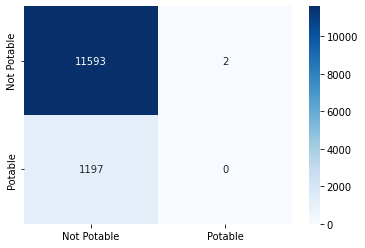

In [21]:
from sklearn.metrics import confusion_matrix
conf_mtrx = confusion_matrix(y_test,y_pred)
print(conf_mtrx)

group_names = ['True Neg', 'False Pos', 'False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_mtrx.flatten()]
group_percentages = ["{0:.2f}".format(value) for value in conf_mtrx.flatten()/np.sum(conf_mtrx)]

labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

class_names = ['Not Potable', 'Potable']
dataf = pd.DataFrame(conf_mtrx,index=class_names, columns=class_names)
sns.heatmap(dataf,annot=True,fmt='',cmap='Blues')

## Arbol de decision

In [28]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth = 7)
decision_tree.fit(x_train,y_train)
y_pred = decision_tree.predict(x_test)
print("Train score",decision_tree.score(x_train,y_train))
print("Test score: ", accuracy_score(y_test,y_pred))

Train score 0.9139276979260897
Test score:  0.9060350218886805


## Support Vector Machine

In [33]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train,y_train)
y_pred = svc_model.predict(x_test)
print("Train score",svc_model.score(x_train,y_train))
print("Test score: ", accuracy_score(y_test,y_pred))

Train score 0.907427882199216
Test score:  0.9064258911819888


## Kneighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier
kneighbors = KNeighborsClassifier(n_neighbors=5)
kneighbors.fit(x_train,y_train)
y_pred = kneighbors.predict(x_test)
print("Train score",kneighbors.score(x_train,y_train))
print("Test score: ", accuracy_score(y_test,y_pred))

Train score 0.9131906054209803
Test score:  0.8988430268918074


A partir de los resultados obtenidos de los modelos, el modelo que mejor se clasifica al dataset es el de Arbol de decision con una profundidad de 7, debido a que presenta el mejor puntaje en train y test mas altos sin un alto uso computacional. Sin embargo el modelo de kneighbors tambien mostro resultados bastante buenos para la clasificacion.